In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
path = r'C:\Users\Lakshmi Devi\Desktop\Excel Tutioral\New Datasets\Loan Prediction'
os.chdir(path)
os.listdir(path)

['Test.csv', 'Train.csv']

In [3]:
df_test = pd.read_csv("Test.csv")
df = pd.read_csv("Train.csv")

In [4]:
df_test.shape

(367, 12)

In [5]:
df.shape

(614, 13)

In [6]:
df.dropna(how="any",inplace=True)

In [7]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [9]:
df.duplicated().any()

False

The percentage of Y class : 0.69
The percentage of N class : 0.31


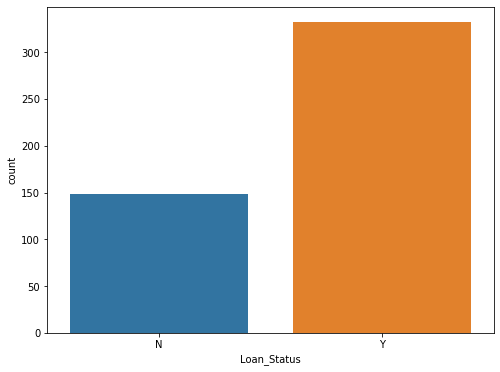

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

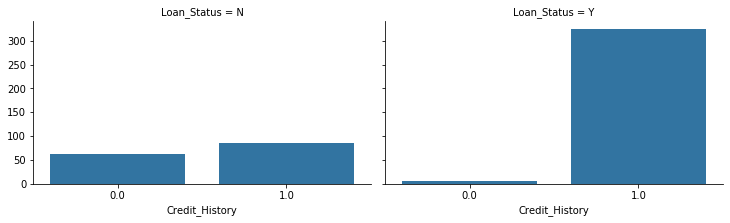

In [12]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

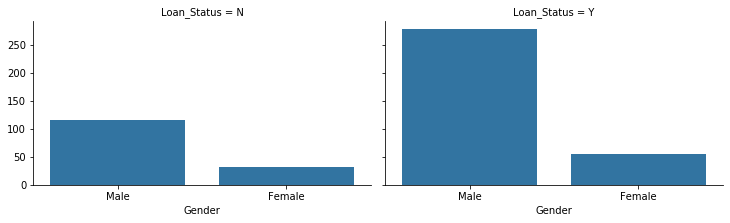

In [13]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

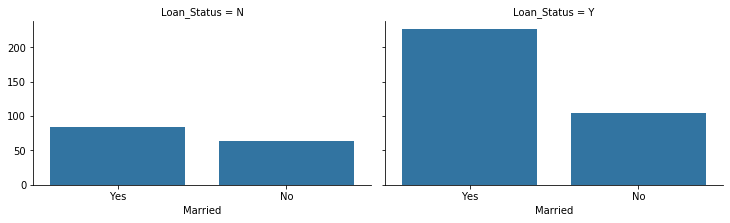

In [14]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married');

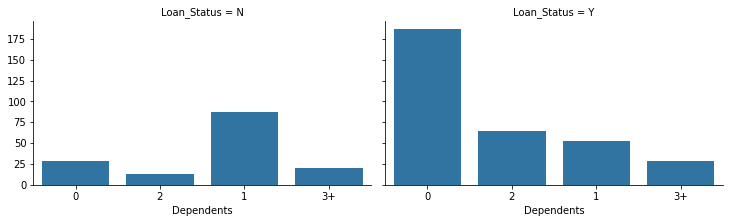

In [15]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Dependents');

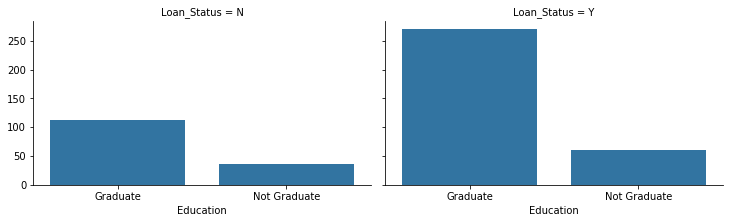

In [16]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

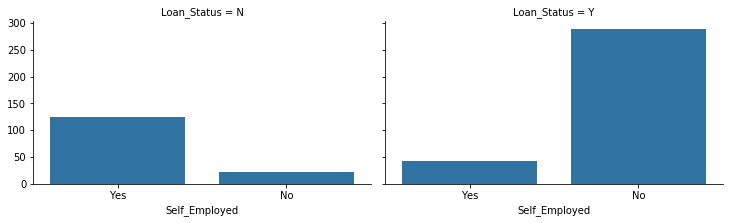

In [17]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

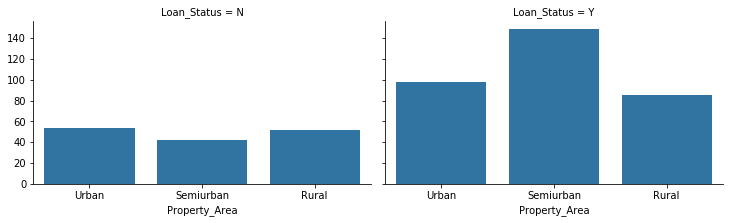

In [18]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Property_Area');

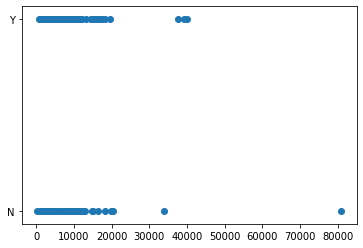

In [19]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

In [20]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3871.0,0.0,128.0,360.0,1.0
Y,3858.5,1211.5,128.0,360.0,1.0


In [21]:
df.isnull().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64

In [22]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [23]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [24]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y


In [25]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
5,5417.0,4196.0,267.0,360.0,1.0


In [26]:
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [27]:
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data 

False

In [28]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y


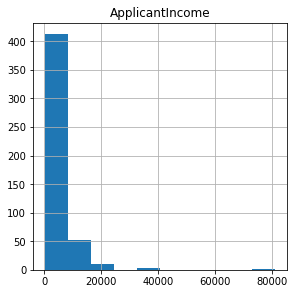

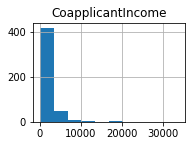

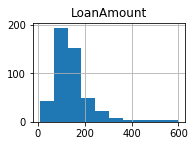

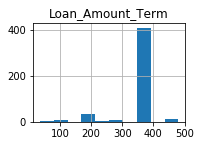

In [29]:
plt.figure(figsize=(10,10))
dfx=df.iloc[:,6:10]
dfy=list(dfx.columns)
counter = 1
for x in dfy:
    plt.subplot(2,2,counter)
    dfx[x].hist()
    plt.title(x)
    plt.show()
    counter = counter + 1

In [30]:
cat_col_names=df.iloc[:,1:].select_dtypes(include=['object'])
cat_var=list(cat_col_names.columns)
for x in cat_var:
    print(cat_col_names[x].value_counts())  

Male      394
Female     86
Name: Gender, dtype: int64
Yes    311
No     169
Name: Married, dtype: int64
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
No     414
Yes     66
Name: Self_Employed, dtype: int64
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64
Y    332
N    148
Name: Loan_Status, dtype: int64


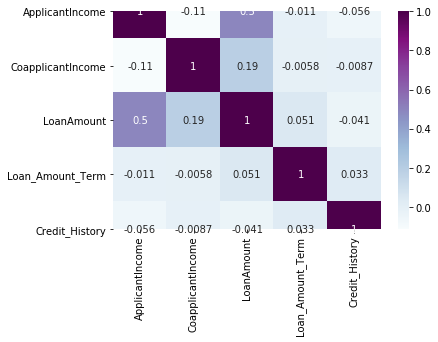

In [31]:
dfx=df.iloc[:,6:11]
sns.heatmap(dfx.corr(),annot=True,cmap='BuPu')
plt.show()

<Figure size 720x720 with 0 Axes>

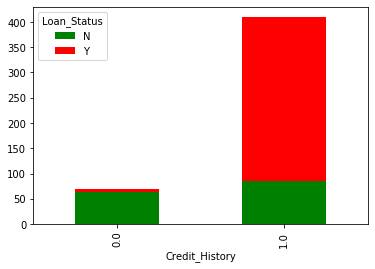

In [32]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(df['Credit_History'],df['Loan_Status'])
dfq.plot(kind='bar', stacked= True ,color =['green','red'],grid=False)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [34]:
var_mod = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i])

In [35]:
train,test = train_test_split(df,test_size=(0.3))
print(train.shape)
print(test.shape)

(336, 13)
(144, 13)


In [36]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
541,LP002743,0,0,0,0,0,2138,0.0,99.0,360.0,0.0,1,0
222,LP001744,1,0,0,0,0,2971,2791.0,144.0,360.0,1.0,1,1


In [37]:
train_X = train.iloc[:,2:11].values
train_Y = train.iloc[:,12].values
test_X = test.iloc[:,2:11].values
test_Y = test.iloc[:,12].values

In [38]:
from sklearn import metrics

In [39]:
model_lr = LogisticRegression()
model_lr.fit(train_X,train_Y)
prediction=model_lr.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_Y)
print("the accuracy score of log_regression is:",format(accuracy))

the accuracy score of log_regression is: 0.7708333333333334


In [40]:
print("The Total Number of Testing Records :",test_Y.shape[0])
count = 0
for x in range(len(test_Y)):
    if(test_Y[x]==prediction[x]):
        count = count + 1
print("The Number of Correctly Predicted Outputs :", count)

The Total Number of Testing Records : 144
The Number of Correctly Predicted Outputs : 111
